### Metodos númericos. Sistema de Ecuaciones no lineales

#### Motivación y metodos cerrados.

Los sistemas lineales son sencillos, se resuelven con la inversa de la matriz, visto en algebra lineal, es sencillo ocupar paquetes numpy.linalg que ustedes pueden aprender y que utilizaremos en el curso Optimización aplicada a negocios. Por lo que nos enfocaremos en métodos para la resolución de sistemas no lineales, lo que implica que las ecuaciones tienen al menos una variables cuyo exponente es distinto a 1.

- Ejemplo: Circunferencia de radio 2 y recta y=x. El sistema de ecuaciones no lineal seria:

$$ x^2 + y^2 = 4 $$
$$ x - y = 0 $$

Si se sustituye, $y = x$ en la circunferencia queda la ecuación:

$$ x^2 = 2 $$

Nosotros sabemos que existen dos soluciones, $-\sqrt{2}$ y $\sqrt{2}$, gráficamente:

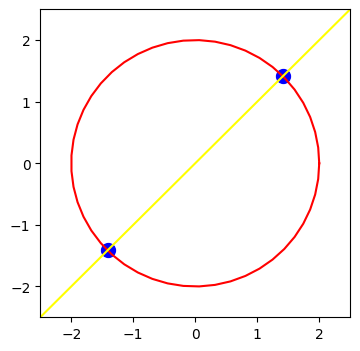

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# para la circunferencia uso polares
ang = np.linspace(0, 2*np.pi) # 50 puntos por defecto
radio = 2
xcirc = radio*np.cos(ang)
ycirc = radio*np.sin(ang)

# para la recta uso intervalo [-2, 2] en ambos ejes
intmax = 2.5
intmin = -2.5
xlin = np.linspace(intmin, intmax)

solucion = [-2**.5,2**.5]
plt.figure(figsize=(4, 4))
plt.scatter(solucion, solucion, color="blue", s=100)
plt.plot(xcirc, ycirc, color="red")
plt.plot(xlin, xlin, color="yellow") # y = x
plt.xlim(intmin, intmax)
plt.ylim(intmin, intmax)
plt.show()

En palabras simples, la sustitución nos permitio reducir el sistema de ecuaciones anterior a la busqueda de raices de la funcion, donde la solución pueden ser números reales o complejos.

$$ f(x) = x^2 -2 $$

Existen metodos númericos para encontrar **UNA** solución, Los distintos metodos se dividen en cerrados y abiertos.

- Cerrados: Algunos son bisección y falsa posición. Estos metodos requieren conocer un intervalo donde hay una solución y siempre converge.
- Abiertos: Algunos son secante y newton-raphson. Estos metodos requieren un punto inicial (ojala cercano a la solución) y podria no converger. En general, si converge lo hace con mayor rapidez a la solución.

### Biseccion

Revisar en https://es.wikipedia.org/wiki/M%C3%A9todo_de_bisecci%C3%B3n

En nuestro ejemplo $f(0) = -2 < 0$ y $f(2) = 2 > 0$, en el intervalo $[0,2]$ tenemos una raiz, pues la funcion es continua.

In [10]:
from math import sin
import numpy as np

xmin = -100
xmax = -0.1
funcion = lambda x: 3*sin(3*x)/x-4
tolerancia = 0.000001
iteraciones = 0
while xmax-xmin > tolerancia:
    iteraciones += 1
    pmedio = np.average((xmin, xmax))
    fmedio = funcion(pmedio)
    if fmedio == 0:
        break
    else:
        fmin = funcion(xmin)
        if fmin*fmedio < 0:
            xmax = pmedio
        else:
            xmin = pmedio
print(2**.5, pmedio, iteraciones)
# ustedes deberian calcular error y tiempos de ejecucion
# no necesitamos cuidarnos con un numero maximo iteraciones pues siempre converge

1.4142135623730951 -0.6744749166071415 27


### Metodo falsa posicion

Este metodo iterativo en vez del punto medio, usa un promedio ponderado, tal como los metodos de las clases anteriores.

Revisemos la raiz de la función:

$$ f(x) = 3 \frac{sin(3x)}{x}$$

La diferencia con el metodo anterior, es que se queda al lado izquierdo de la función, en cambio bisección apunta al medio. Graficamente la función se ve asi:

https://es.wikipedia.org/wiki/M%C3%A9todo_de_la_regla_falsa

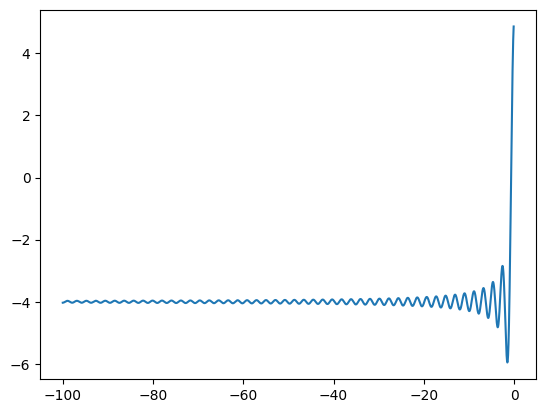

In [11]:
funcion = lambda x: 3*sin(3*x)/x-4
x = np.linspace(-100, -0.1, 10000)
y = [funcion(i) for i in x]
plt.plot(x,y)
plt.show()

In [12]:
xmin = -100
xmax = -0.1
tolerancia = 0.000001
iteraciones = 0
fmin = funcion(xmin)
fmax = funcion(xmax)
pnuevo = xmax - fmax*(xmax-xmin)/(fmax-fmin)
while pnuevo-xmin > tolerancia:
    iteraciones += 1
    fnuevo = funcion(pnuevo)
    if fnuevo == 0:
        break
    else:
        if fmin*fnuevo < 0:
            xmax = pnuevo
        else:
            xmin = pnuevo
        fmin = funcion(xmin)
        fmax = funcion(xmax)
        pnuevo = xmax - fmax*(xmax-xmin)/(fmax-fmin)

print(2**.5, pnuevo, iteraciones)
# ustedes deberian calcular error y tiempos de ejecucion
# fijense que converge mas rapido que biseccion

1.4142135623730951 -0.6744752307527683 14


In [10]:
# proxima clase metodos abiertos